# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential, load_model


# **Loading the data**

In [ ]:
df = pd.read_csv("/content/train.csv",index_col=0)
df.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


# **Describe the data**

In [ ]:
df.describe()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
count,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,...,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,0.017412,0.028539,0.031988,0.023280,0.014264,0.038579,0.019202,0.001083,0.007167,0.018639,...,0.036501,0.005024,0.015944,0.011586,0.016108,0.014017,0.002688,0.020291,0.008989,0.019420
std,0.019739,0.038855,0.025847,0.028411,0.018390,0.052030,0.017511,0.002743,0.008933,0.016071,...,0.063403,0.019321,0.023214,0.025040,0.015335,0.060151,0.011415,0.039040,0.013791,0.022768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001953,0.001953,0.013672,0.005859,0.001953,0.000000,0.005859,0.000000,0.001953,0.005859,...,0.000000,0.000000,0.000977,0.000000,0.004883,0.000000,0.000000,0.000000,0.000000,0.000977
50%,0.009766,0.011719,0.025391,0.013672,0.007812,0.015625,0.015625,0.000000,0.005859,0.015625,...,0.004883,0.000000,0.005859,0.000977,0.012695,0.000000,0.000000,0.003906,0.002930,0.011719
75%,0.025391,0.041016,0.044922,0.029297,0.017578,0.056153,0.029297,0.000000,0.007812,0.027344,...,0.043701,0.000000,0.022217,0.009766,0.021484,0.000000,0.000000,0.023438,0.012695,0.029297
max,0.087891,0.205080,0.156250,0.169920,0.111330,0.310550,0.091797,0.031250,0.076172,0.097656,...,0.429690,0.202150,0.172850,0.200200,0.106450,0.578130,0.151370,0.375980,0.086914,0.141600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


# **Check missing and duplicates**

In [ ]:
print("The number of null or missing values:", df.isnull().sum().sum())

The number of null or missing values: 0


In [ ]:
print("The number of duplicated values:", df.duplicated().sum().sum())

The number of duplicated values: 0


## **Visualization of correlation and target labels**

In [ ]:
import plotly.express as px
fig = px.imshow(df.corr())
fig.show()

In [ ]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print (so[0:10])

texture13  shape16      0.000008
shape16    texture13    0.000008
margin44   margin64     0.000014
margin64   margin44     0.000014
texture24  shape21      0.000027
shape21    texture24    0.000027
margin42   margin26     0.000033
margin26   margin42     0.000033
margin3    margin9      0.000042
margin9    margin3      0.000042
dtype: float64


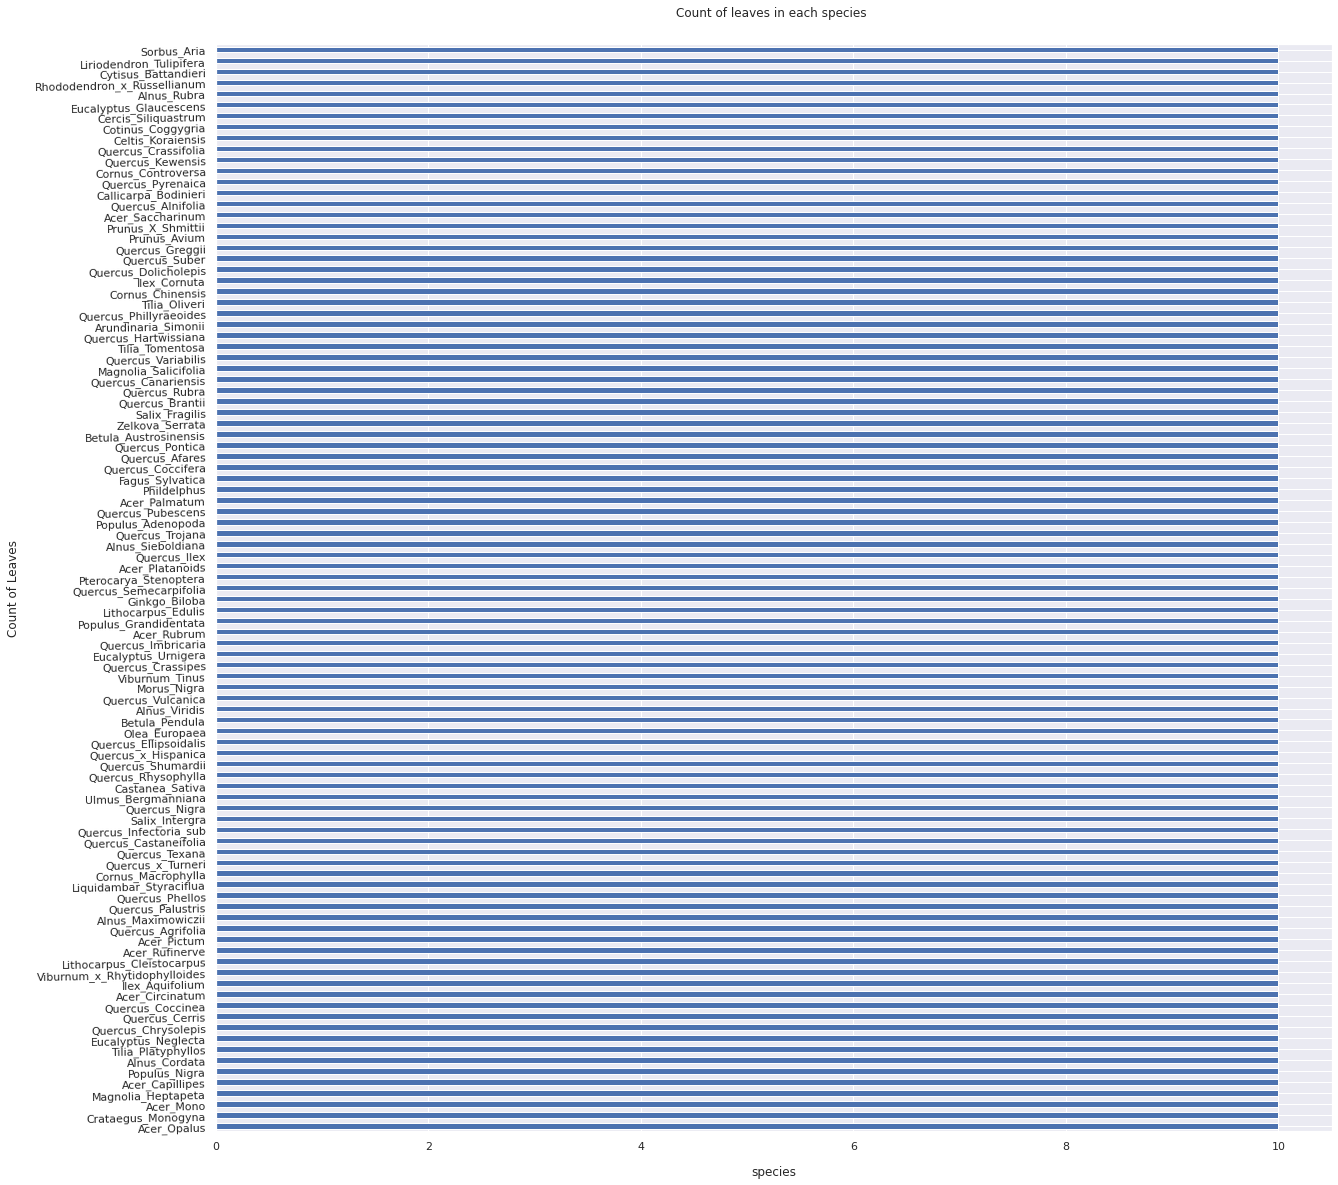

In [ ]:
sns.set(font_scale=1)
df['species'].value_counts().plot(kind='barh', figsize=(20, 20), rot=1)
plt.xlabel("species", labelpad=14)
plt.ylabel("Count of Leaves", labelpad=14)
plt.title("Count of leaves in each species ", y=1.02);

#  **Plotting images**

In [ ]:
images = []
files = glob.glob ("/content/drive/MyDrive/images/images/*.jpg")
for myFile in files:
    image = cv2.imread(myFile, cv2.IMREAD_GRAYSCALE)
    images.append(image)

print('X_data shape:', np.array(images).shape)

X_data shape: (1594,)


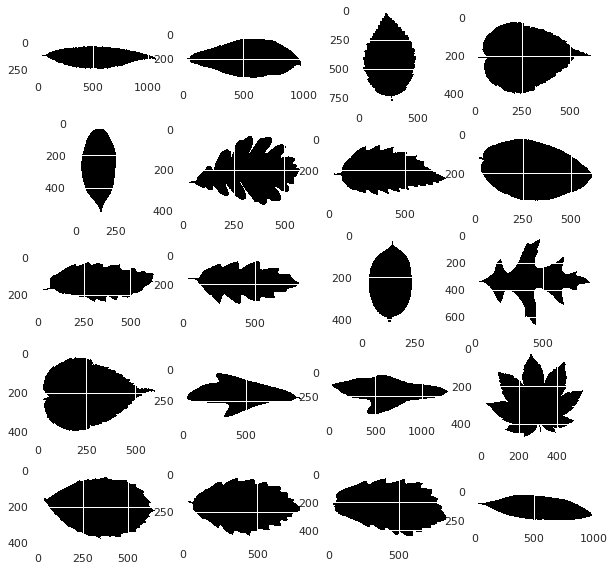

In [ ]:
fig = plt.figure(figsize=(10, 10))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img,cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# **Label Encoding for target column**

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])

classes_number=df['species'].unique()
classes_number.shape

(99,)

# **Dividing data into trainig set and testing set**

In [ ]:
Y = df['species']
X = df.drop('species', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=44, stratify=Y)
print(X_train.shape)
print(X_test.shape)

(792, 192)
(198, 192)


# **Function for training the different trials**

In [ ]:
def train (hidden=170,batch_size=10,optimizers="adam",epochs=100):
#Building the model
    model = keras.Sequential()
    model.add(Dense(hidden, activation='tanh', input_shape=(192,), kernel_initializer = 'glorot_uniform', bias_initializer='zeros', name = 'Layer_1'))
    model.add(Dropout(.2))
    model.add(Dense(99, activation='softmax'))

#compiling
    model.compile(loss='sparse_categorical_crossentropy', optimizer= optimizers, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test],verbose = 0)

#Plot the curves of  loss/accuracy for training and validation data
    val_loss_per_epoch = history.history['val_loss']
    loss_per_epoch = history.history['loss']
    val_accuracy_per_epoch = history.history['val_accuracy']
    accuracy_per_epoch = history.history['accuracy']
    plt.figure(figsize=(8,8))
    plt.title(f"model training loss & validation")
    plt.xlabel('epoch')
    plt.ylabel('loss function')
    plt.plot(np.arange(1,len(val_loss_per_epoch)+1),val_loss_per_epoch,label="validation loss")
    plt.plot(np.arange(1,len(loss_per_epoch)+1),loss_per_epoch,label = "training loss")
    plt.legend(loc="upper left")
    plt.show()
    plt.figure(figsize=(12,12))
    plt.title(f"model training accuracy & validation accuracy")
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(np.arange(1,len(val_accuracy_per_epoch)+1),val_accuracy_per_epoch,label="validation accuracy")
    plt.plot(np.arange(1,len(accuracy_per_epoch)+1),accuracy_per_epoch,label = "training accuracy")
    plt.legend(loc="upper left")
    return  model

# **Evaluation Function**

In [ ]:
def evaluation(model,X_train,X_test,y_train,y_test):

    # Get the training and test accuracy
    keras.backend.clear_session()
    training_accuracy=model.evaluate(X_train, y_train,verbose=0)
    validation_accuracy=model.evaluate(X_test,y_test,verbose=0)
    print ("Training accuracy: ", training_accuracy[1])
    print ("Testing accuracy: ", validation_accuracy[1])
    

# **Hidden Layer units Tuning:**

## **1-**

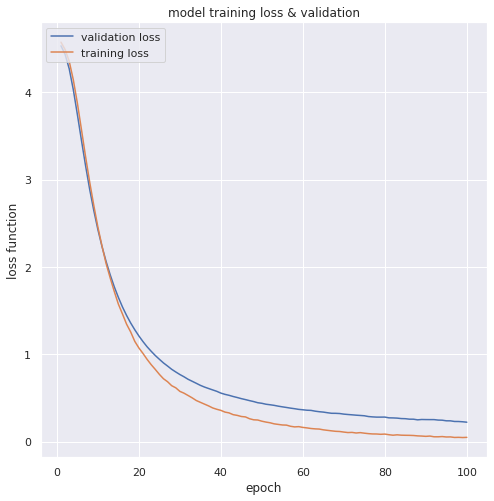

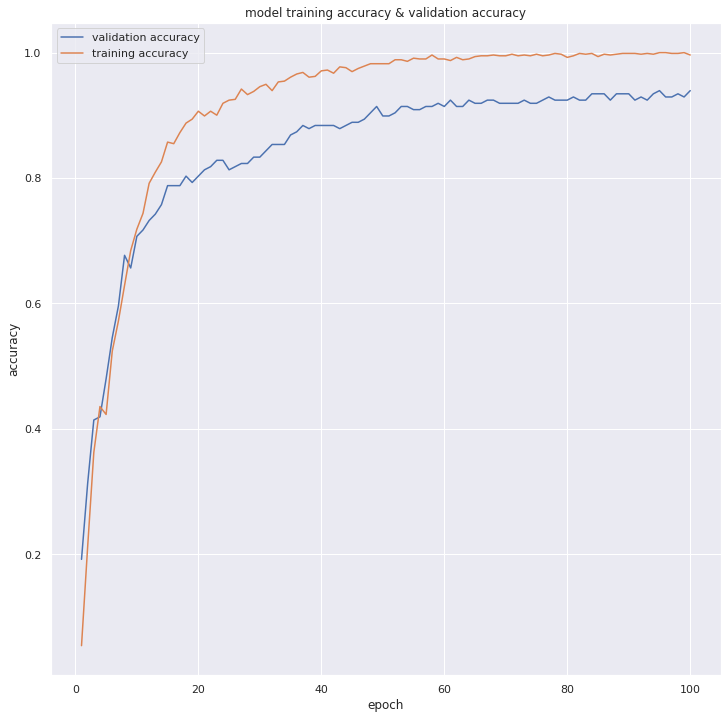

In [ ]:
model = train(hidden=100)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.939393937587738


## **2-**

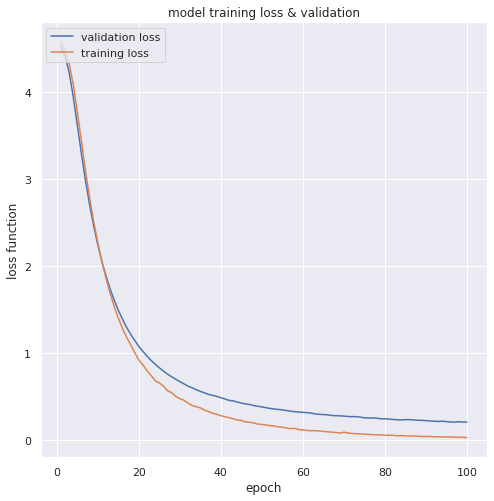

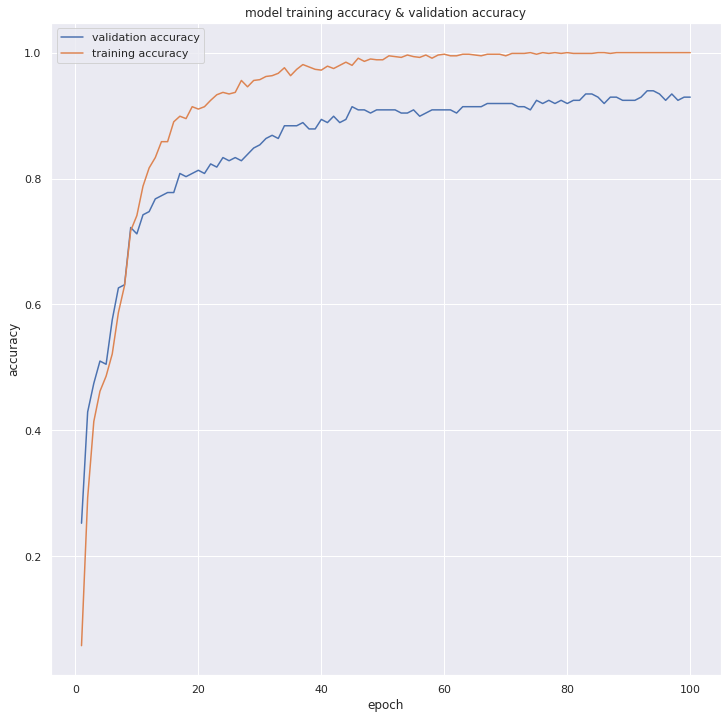

In [ ]:
model = train(hidden=120)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.9292929172515869


## **3-**

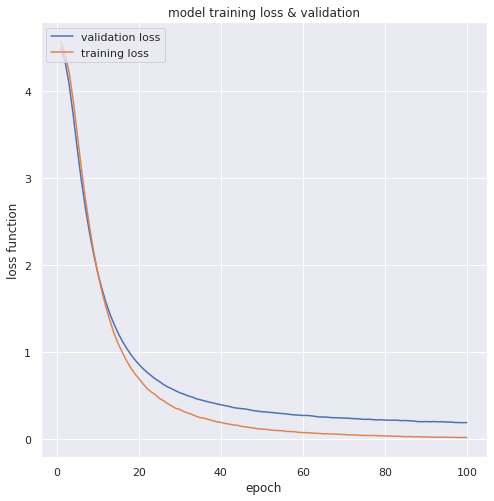

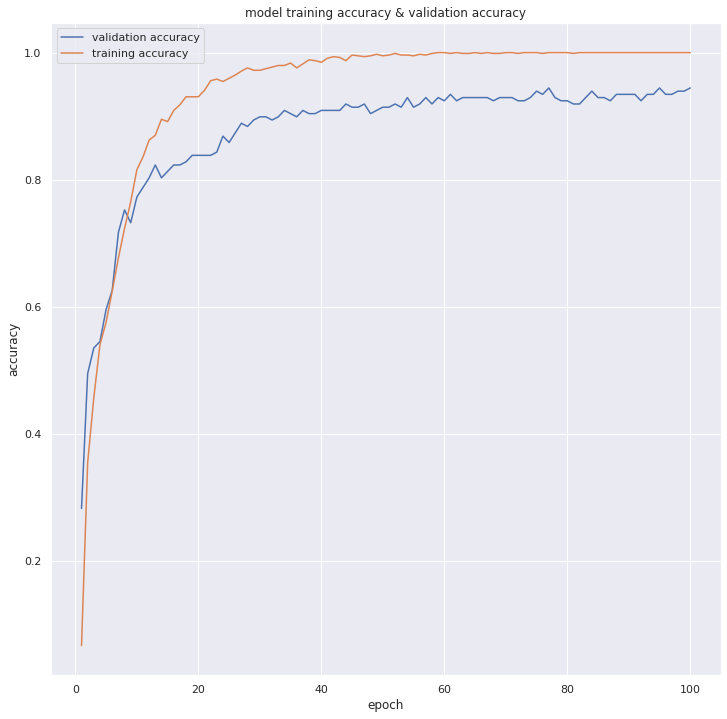

In [ ]:
model = train(hidden=170)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.9444444179534912


## **4-**

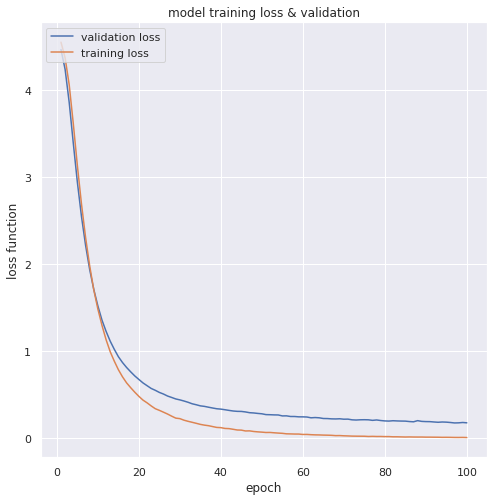

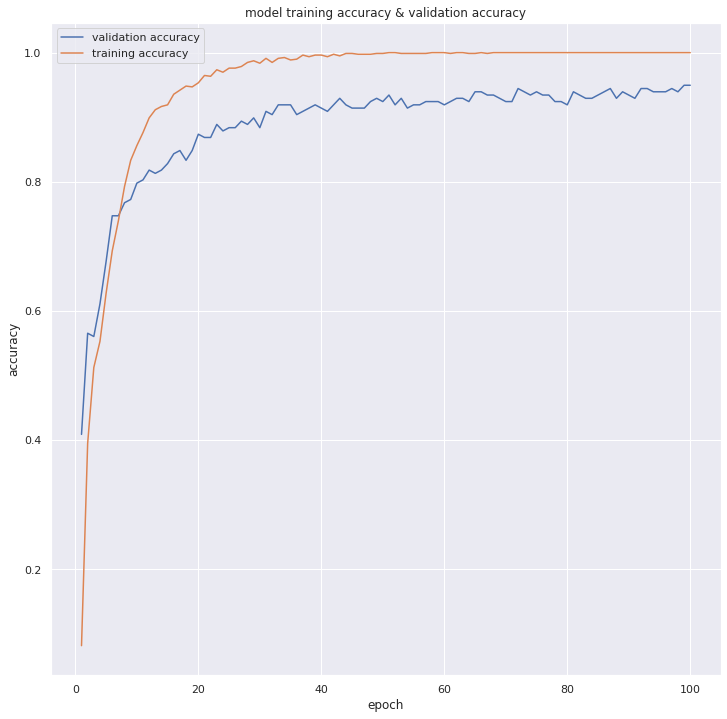

In [ ]:
model = train(hidden=256)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.9494949579238892


# **Optimizers Tuning:**

## **1-**

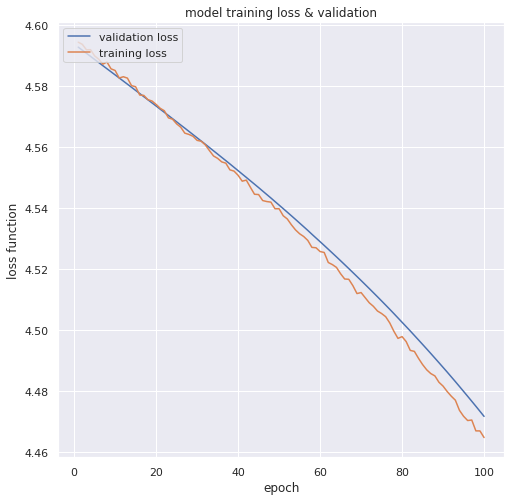

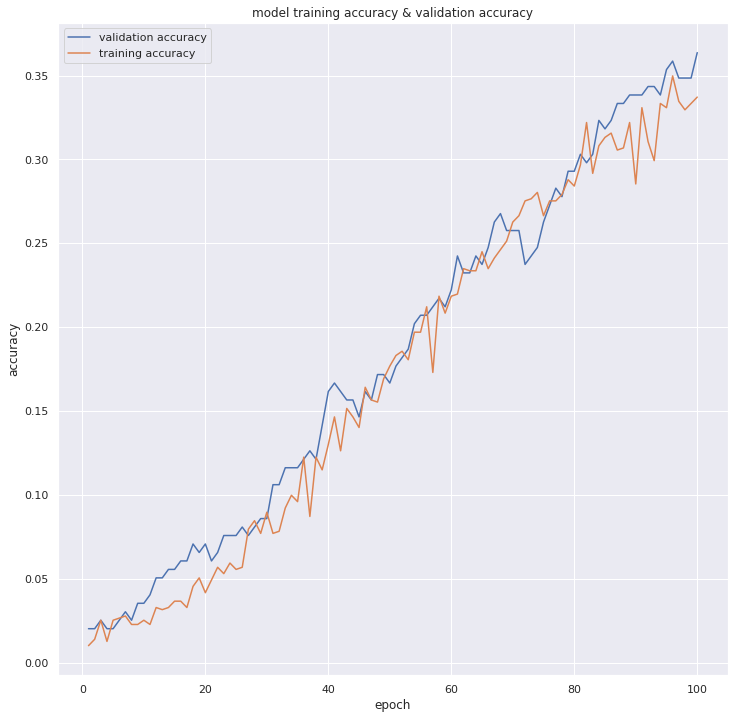

In [ ]:
model = train(optimizers='SGD')


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  0.3863636255264282
Testing accuracy:  0.3636363744735718


## **2-**

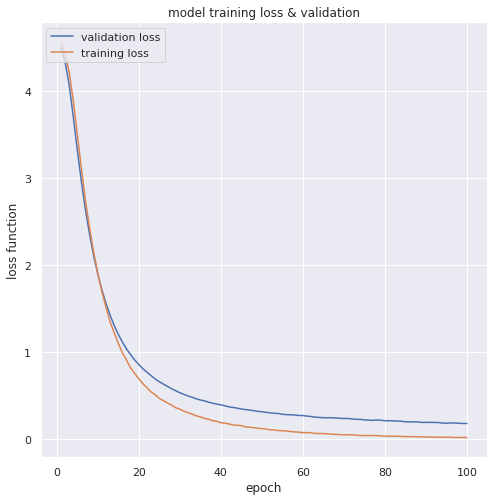

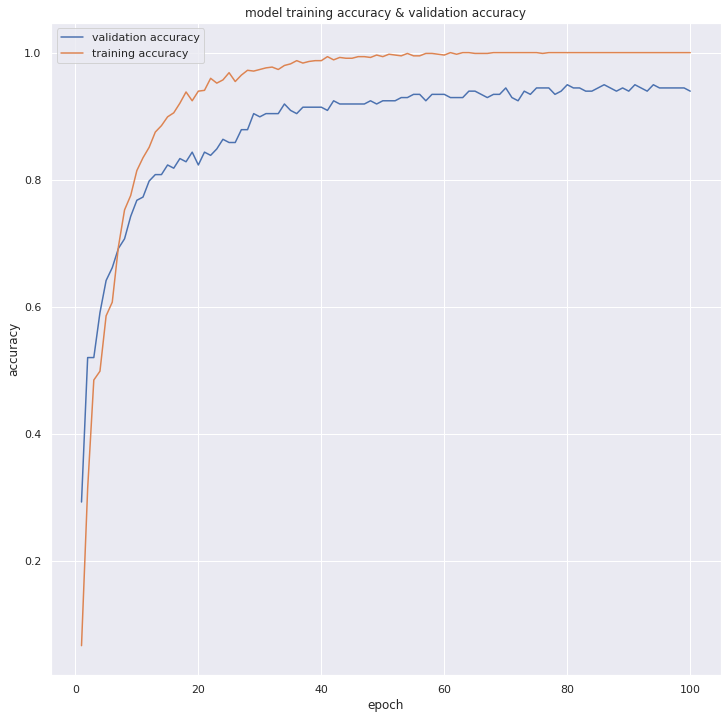

In [ ]:
model = train(optimizers='adam')


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.939393937587738


## **3-**

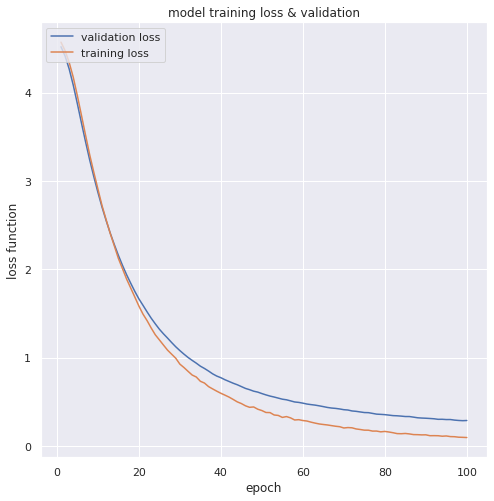

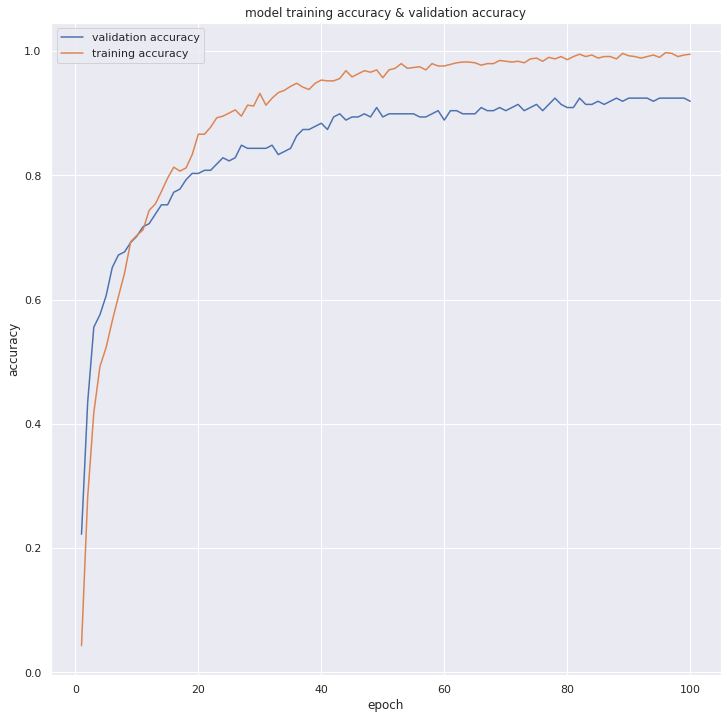

In [ ]:
model = train(optimizers='rmsprop')


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  0.997474730014801
Testing accuracy:  0.9191918969154358


# **Batch size Tuning**

## **1-**

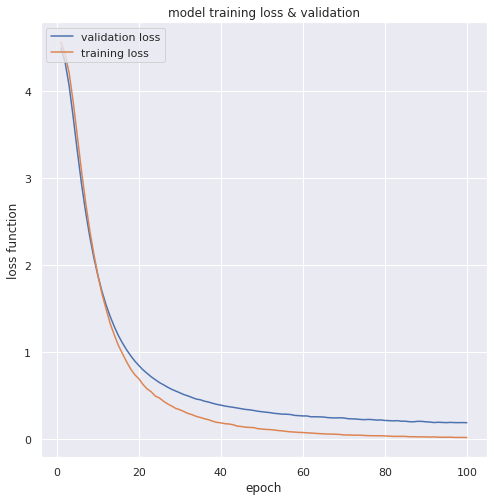

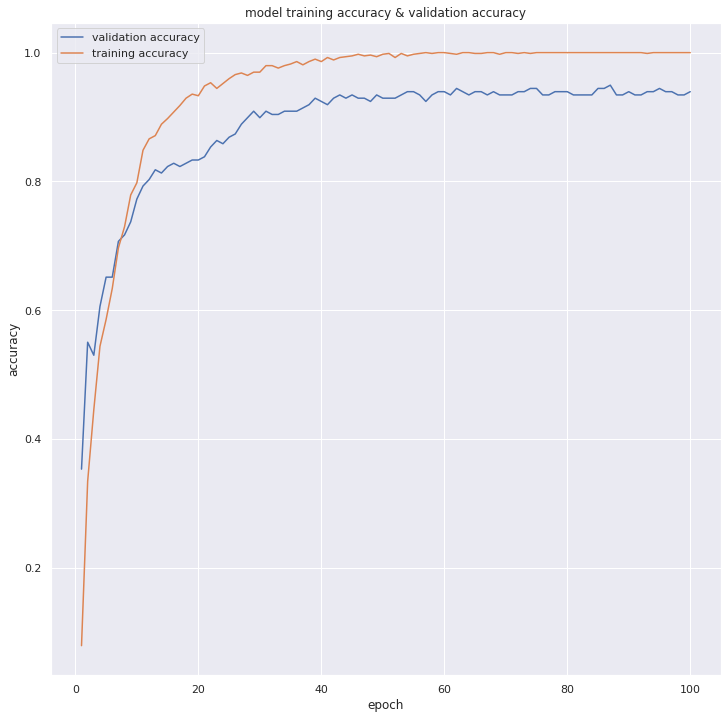

In [ ]:
model = train(batch_size=10)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.939393937587738


## **2-**

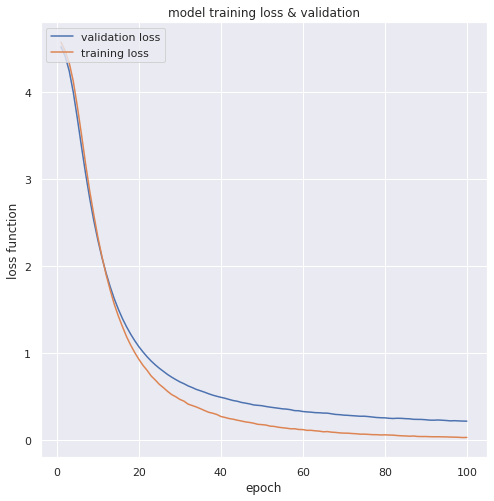

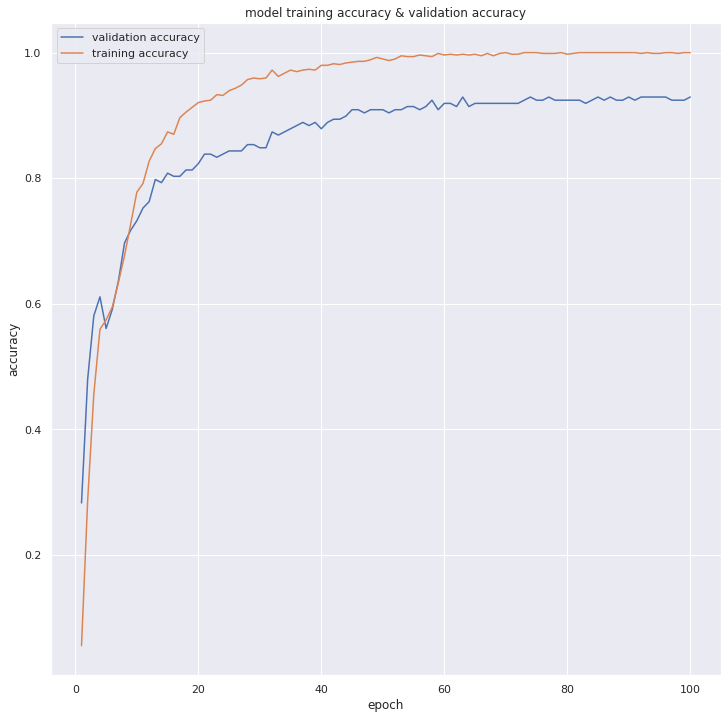

In [ ]:
model = train(batch_size=15)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.9292929172515869


## **3-**

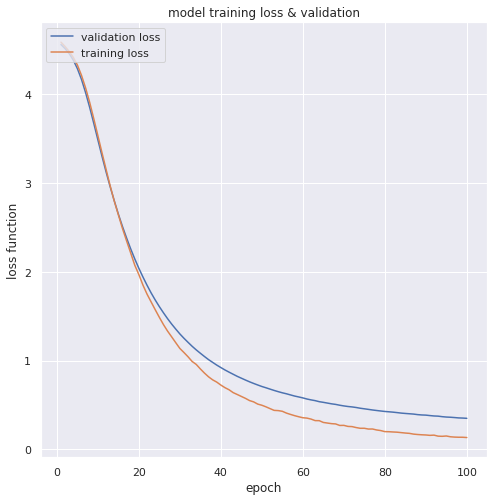

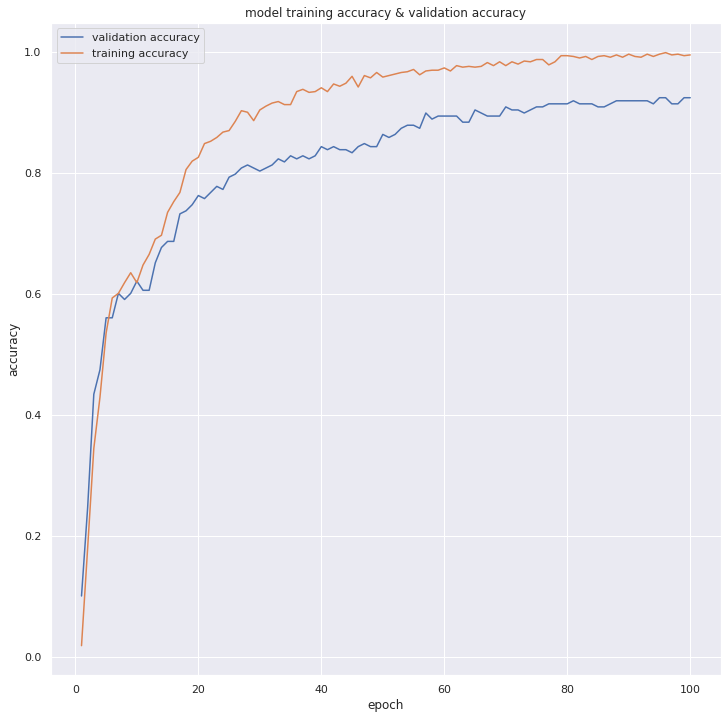

In [ ]:
model = train(batch_size= 40)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  0.9987373948097229
Testing accuracy:  0.9242424368858337


# **Epochs number Tuning**

## **1-**

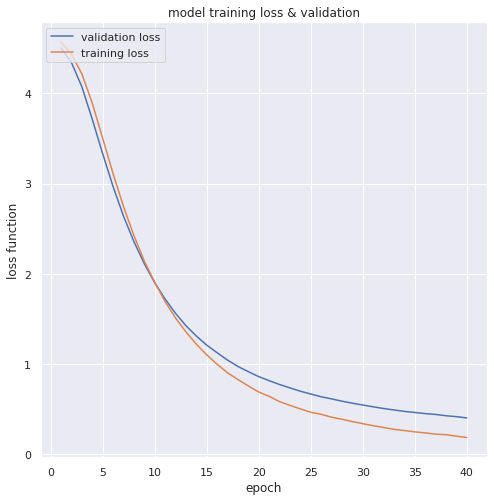

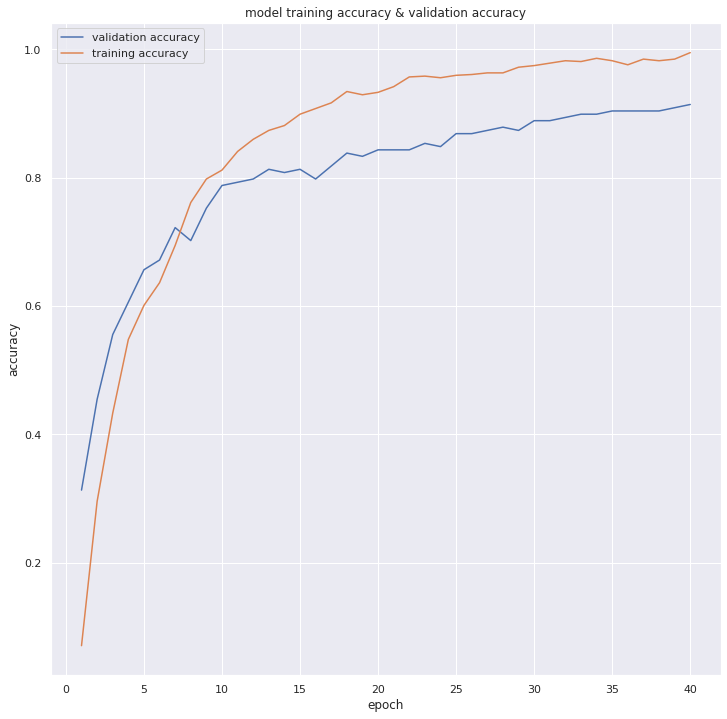

In [ ]:
model = train(epochs= 40)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  0.9949495196342468
Testing accuracy:  0.9141414165496826


## **2-**

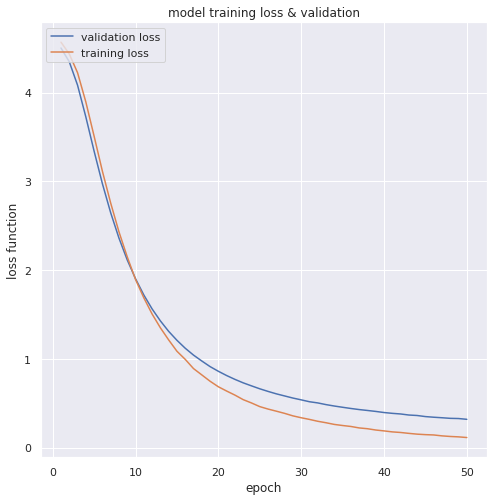

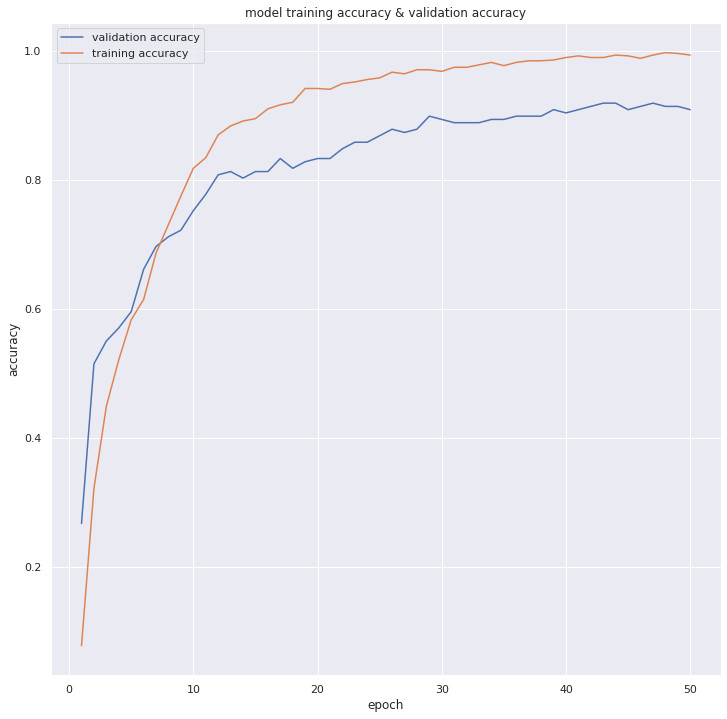

In [ ]:
model = train(epochs= 50)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  0.997474730014801
Testing accuracy:  0.9090909361839294


## **3-**

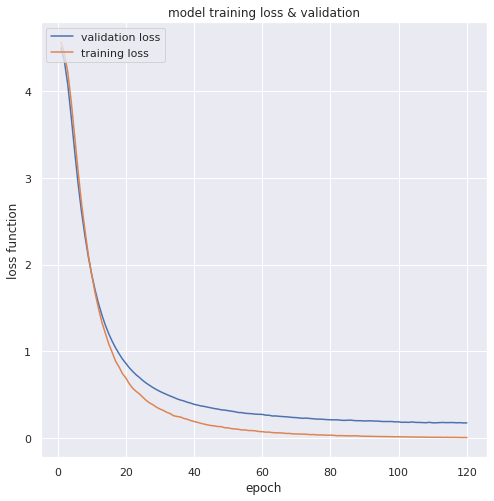

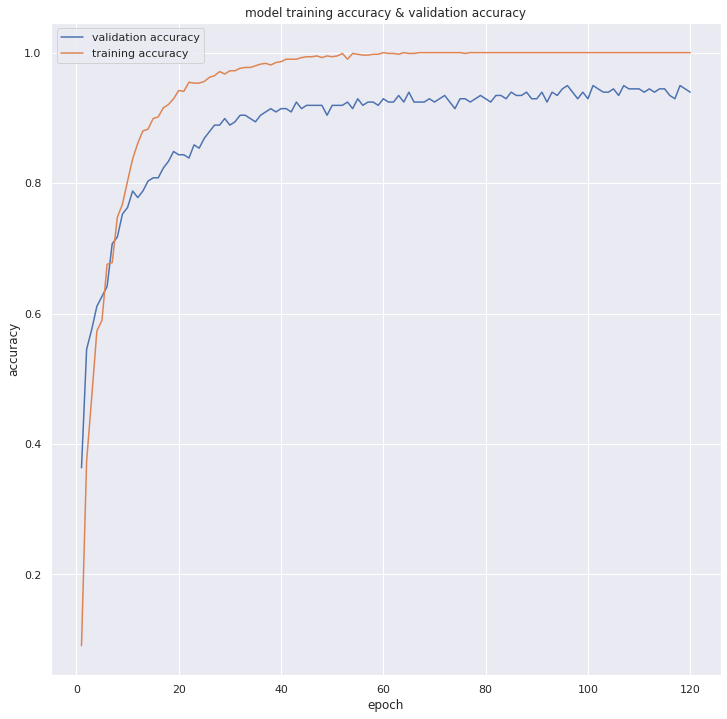

In [ ]:
model = train(epochs= 120)


In [ ]:
evaluation(model,X_train,X_test,y_train,y_test)

Training accuracy:  1.0
Testing accuracy:  0.939393937587738
